In [2]:
import configparser

# load up the parameter file
parser = configparser.ConfigParser()
parser.read('../params.ini')


# setting paths containg HR5 directories
#Fofd = parser.get('Paths','Fofdir')
output = '/scratch/ankitsingh/Galaxy_catalogs/ICL_data/CEAGLE/Data/Output/CDM/halo05/'


In [3]:
snapno=1
import h5py 
with h5py.File(f'{output}/clusters{snapno}.hdf5','r') as f:

    # print in scintific notions
    print(f"{f['0'].attrs['mstar']:.3e}")


3.580e+12


## FITS File

In [12]:
from astropy.io import fits

# Open the FITS file
with fits.open(f'/scratch/ankitsingh/Galaxy_catalogs/ICL_data/CEAGLE/Data/Output/CDM/halo05/0/1_0.fits') as hdulist:

    
    # Print the structure of the FITS file
    print(hdulist.info())

    # Iterate through each HDU
    for i, hdu in enumerate(hdulist):
        print(f"\nHDU {i}:")
        print(f"Type: {type(hdu)}")
        
        # Check if the HDU contains image data
        if hasattr(hdu, 'data') and hdu.data is not None:
            print(f"Image shape: {hdu.data.shape}")
            print(f"Data type: {hdu.data.dtype}")
            
            # Check if there is a header
            if hasattr(hdu, 'header'):
                print(f"Header information:")
                print(repr(hdu.header))


Filename: /scratch/ankitsingh/Galaxy_catalogs/ICL_data/CEAGLE/Data/Output/CDM/halo05/0/1_0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  ALL_STAR_DENSITY_X    1 PrimaryHDU      30   (1024, 1024)   float64   
  1  BCG_STAR_DENSITY_X    1 ImageHDU        31   (1024, 1024)   float64   
  2  REST_STAR_DENSITY_X    1 ImageHDU        31   (1024, 1024)   float64   
  3  ICL_STAR_DENSITY_X    1 ImageHDU        31   (1024, 1024)   float64   
  4  ALL_STAR_DENSITY_Y    1 ImageHDU        31   (1024, 1024)   float64   
  5  BCG_STAR_DENSITY_Y    1 ImageHDU        31   (1024, 1024)   float64   
  6  REST_STAR_DENSITY_Y    1 ImageHDU        31   (1024, 1024)   float64   
  7  ICL_STAR_DENSITY_Y    1 ImageHDU        31   (1024, 1024)   float64   
  8  ALL_STAR_DENSITY_Z    1 ImageHDU        31   (1024, 1024)   float64   
  9  BCG_STAR_DENSITY_Z    1 ImageHDU        31   (1024, 1024)   float64   
 10  REST_STAR_DENSITY_Z    1 ImageHDU        31   (1024, 1024)   float64   
 11

## Mass from FITS file

In [13]:
from astropy.io import fits
import numpy as np

# Open the FITS file
with fits.open(f'/scratch/ankitsingh/Galaxy_catalogs/ICL_data/CEAGLE/Data/Output/CDM/halo05/0/1_0.fits') as hdulist:

  

    # Access a specific HDU by its name
    hdu_name = 'All_STAR_DENSITY_X'  # Replace with the name of the HDU you want to access
    hdu = hdulist[hdu_name]
    data = hdu.data
    header = hdu.header
    
        
    # Extract the scale information
    scale_str = header['SCALE']  
    
    scale_numerator, unit = scale_str.split(' ')
    scale_value = float(scale_numerator.split('/')[0])/float(scale_numerator.split('/')[1]) 
  
    # # Convert scale to kpc^2 per pixel
    scale_kpc_per_pixel = (scale_value) * 1000  # Convert Mpc to kpc
    pixel_area_kpc2 = scale_kpc_per_pixel**2

    # Calculate total mass
    total_mass = np.nansum(data) * pixel_area_kpc2  # Msun

    print(f"Total stellar mass: {total_mass:.3e} Msun")

Total stellar mass: 3.580e+12 Msun


/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/site-packages/matplotlib/image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/site-packages/matplotlib/image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/site-packages/matplotlib/image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/site-packages/matplotlib/image.py:478: UserWarning: Warning: converting a masked element to nan.
  dtype=scaled_dtype)


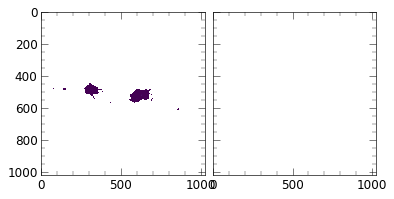

In [ ]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

plt.style.use('../../paper_style.mplstyle')


fig,ax = plt.subplots(1,2,sharey=True)

with fits.open(f'/scratch/ankitsingh/Galaxy_catalogs/ICL_data/CEAGLE/Data/Output/CDM/halo05/0/1_0.fits') as hdulist:

    ax[0].imshow(hdulist[0].data)

with fits.open(f'/scratch/ankitsingh/Galaxy_catalogs/ICL_data/CEAGLE/Data/Output/CDM/halo05/0/1_0_r200.fits') as hdulist:

    ax[1].imshow(hdulist[0].data)

In [1]:
import CEAGLE_module as ceg
clusid = 0
clus = ceg.Cluster(1,clusid)
gal = clus.get_alldat_gal(clus.bcgid)


/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/_collections_abc.py:666: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/_collections_abc.py:666: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


(-1.0, 1.0)

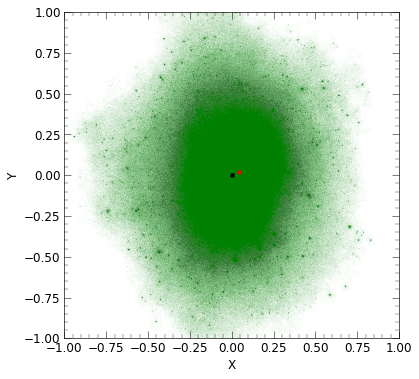

In [1]:
import matplotlib.pyplot as plt


import numpy as np

import CEAGLE_module as ceg
clusid = 0
clus = ceg.Cluster(1,clusid)
gal = clus.get_alldat_gal(clus.bcgid)


com = gal._center_of_mass('star')
com_dm = gal._center_of_mass('dm')


fig,ax = plt.subplots(1,1)
ax.set_xlabel(r'X')
ax.set_ylabel(r'Y')
# ax.scatter(gal.star_pos_com[:,0],gal.star_pos_com[:,1],color='b',s=0.00001)
ax.scatter(gal.dm_pos_com[:,0],gal.dm_pos_com[:,1],color='g',s=0.00001)

ax.scatter(com[0],com[1],color='r',s=10)
ax.scatter(com_dm[0],com_dm[1],color='k',marker='x',s=10)

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)


In [ ]:
gal.clus_pos - gal.gal_pos

array([ 0.49920703, -0.83596467, -0.10351877])

: 

In [23]:
com

array([ 0.04452771,  0.01862092, -0.00264456])